In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score


In [2]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL.csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.511705,1.000000,0.380783,0.002563,0.003350,0.453849,0.206589,0.038336,...,1.0,1.0,0.775862,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
1,0.0,0.0,0.512088,0.848367,0.371018,0.003331,0.003961,0.461811,0.206589,0.038640,...,1.0,1.0,0.784483,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
2,0.0,0.0,0.511337,0.664417,0.338931,0.004087,0.005054,0.469933,0.206589,0.048814,...,1.0,1.0,0.793103,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.509767,0.472346,0.347603,0.006803,0.007776,0.476156,0.206589,0.073088,...,1.0,1.0,0.801724,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
4,0.0,0.0,0.508391,0.404584,0.356862,0.008622,0.009476,0.483780,0.206589,0.043774,...,1.0,1.0,0.810345,1.0,1.0,0.166667,0.0,0.0,1.0,0.0


In [3]:
# 讀入資料
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)


In [5]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9230769230769231


In [7]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=2)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8717948717948718


Confusion Matrix:
 [[68  0]
 [10  0]]
Accuracy: 0.8717948717948718
Recall Score (Macro) 0.5
Recall Score (Default) 0.0
Precision Score (Macro) 0.9358974358974359
Precision Score (Default) 1.0
F1 Score (Macro): 0.4657534246575343
F1 Score (Default): 0.0
ROC_AUC Score 0.5


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


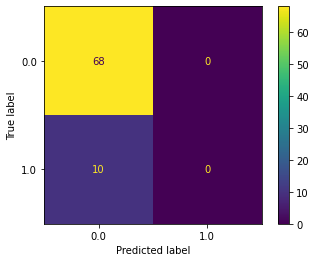

In [8]:
# 績效
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))

print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [9]:
'''
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='NB (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()
'''

"\nfpr, tpr, threshold = roc_curve(y_test, y_pred)\nauc = auc(fpr, tpr)\n\nplt.figure(figsize=(5, 5), dpi=100)\nplt.plot(fpr, tpr, linestyle='-', label='NB (auc = %0.3f)' % auc)\n\nplt.xlabel('False Positive Rate -->')\nplt.ylabel('True Positive Rate -->')\n\nplt.legend()\nplt.show()\n"

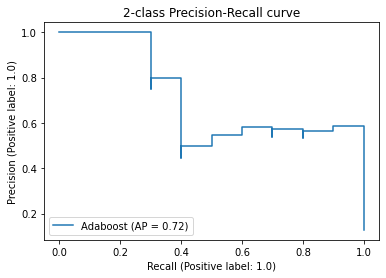

In [10]:
#AP = Average precision 
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="Adaboost"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [11]:
#GridSearchCV

In [12]:
# define the model with default hyperparameters
model = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall')

# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
y_pred = grid_result.predict(X_test)

Confusion Matrix:
 [[67  1]
 [ 7  3]]
Accuracy: 0.8974358974358975
Recall Score (Macro) 0.6426470588235295
Recall Score (Default) 0.3
Precision Score (Macro) 0.8277027027027026
Precision Score (Default) 0.75
F1 Score (Macro): 0.6861167002012072
F1 Score (Default): 0.4285714285714285
ROC_AUC Score 0.6426470588235295


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


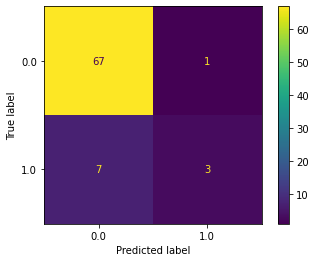

In [13]:
# 績效
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(grid_result, X_test, y_test)  
plt.show()

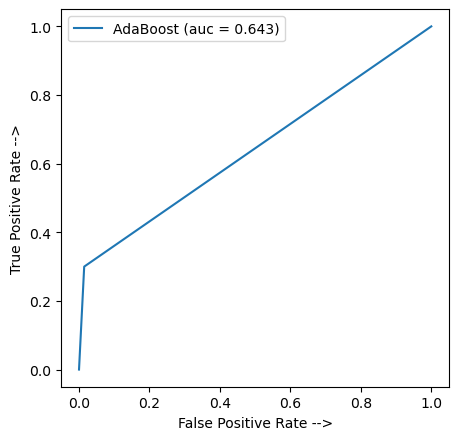

In [14]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='AdaBoost (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

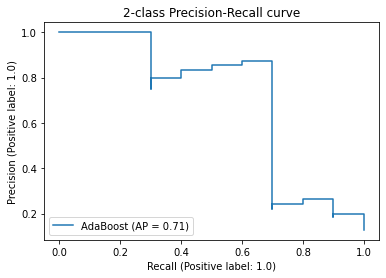

In [15]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grid_search, X_test, y_test, name="AdaBoost"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")